In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

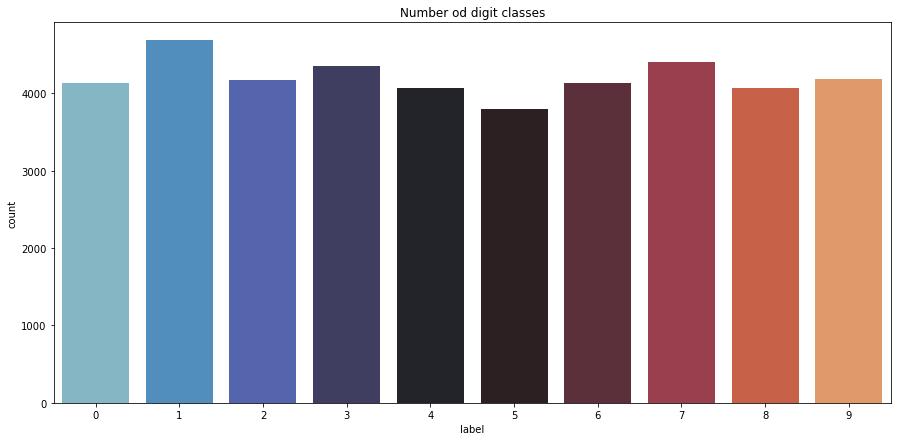

In [5]:
plt.figure(figsize=(15,7))
sns.countplot(Y_train, palette="icefire")
plt.title("Number od digit classes")
Y_train.value_counts()

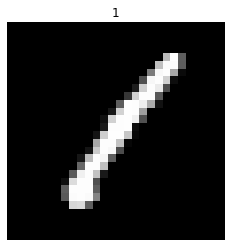

In [6]:
img = X_train.values[0]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

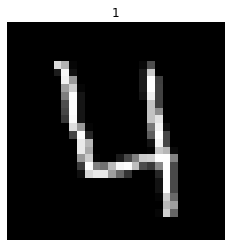

In [7]:
img = X_train.values[3]
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel. 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [8]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x_train shape: ", X_train.shape)
print("test shape: ", test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


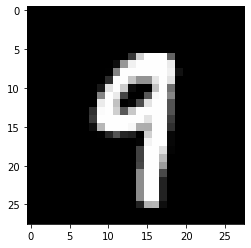

In [12]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()

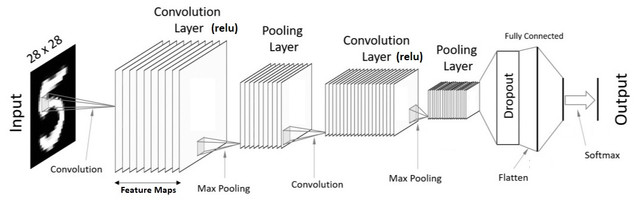

### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

In [13]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same",
                activation = "relu", input_shape = (28, 28, 1)))
model.add((MaxPool2D(pool_size=(2,2))))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "Same",
                activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [15]:
optimizer = Adam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)

In [16]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [17]:
epochs = 10
batch_size = 250

In [18]:
datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range = 0.5,
                            zoom_range=0.5,
                            width_shift_range=0.5,
                            height_shift_range = 0.5,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(X_train)

In [20]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),
                             epochs= epochs, validation_data = (X_val, Y_val), steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 32s 211ms/step - loss: 2.2033 - accuracy: 0.1779 - val_loss: 1.9584 - val_accuracy: 0.2567
Epoch 2/10
151/151 [==============================] - 40s 266ms/step - loss: 1.9717 - accuracy: 0.2958 - val_loss: 1.2775 - val_accuracy: 0.6402
Epoch 3/10
151/151 [==============================] - 30s 201ms/step - loss: 1.7569 - accuracy: 0.3915 - val_loss: 0.9151 - val_accuracy: 0.7802
Epoch 4/10
151/151 [==============================] - 50s 331ms/step - loss: 1.6147 - accuracy: 0.4418 - val_loss: 0.6779 - val_accuracy: 0.8448
Epoch 5/10
151/151 [==============================] - 45s 301ms/step - loss: 1.5146 - accuracy: 0.4776 - val_loss: 0.5358 - val_accuracy: 0.8745
Epoch 6/10
151/151 [==============================] - 31s 206ms/step - loss: 1.4391 - accuracy: 0.5052 - val_loss: 0.4662 - val_accuracy: 0.8814
Epoch 7/10
151/151 [==============================] - 32s 211ms/step - loss: 1.3988 - accuracy: 0.5214 - val_loss: 0.4014 - val_ac

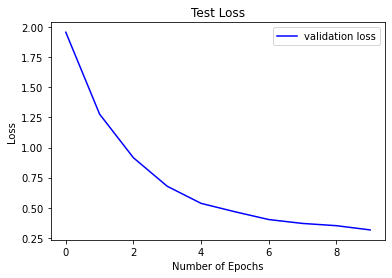

In [21]:
plt.plot(history.history["val_loss"], color ="b", label ="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

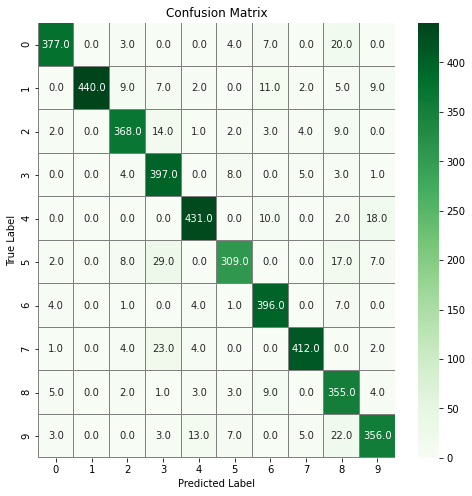

In [25]:
import seaborn as sns

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths = 0.01, cmap="Greens", linecolor = "gray", fmt = ".1f", ax =ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()